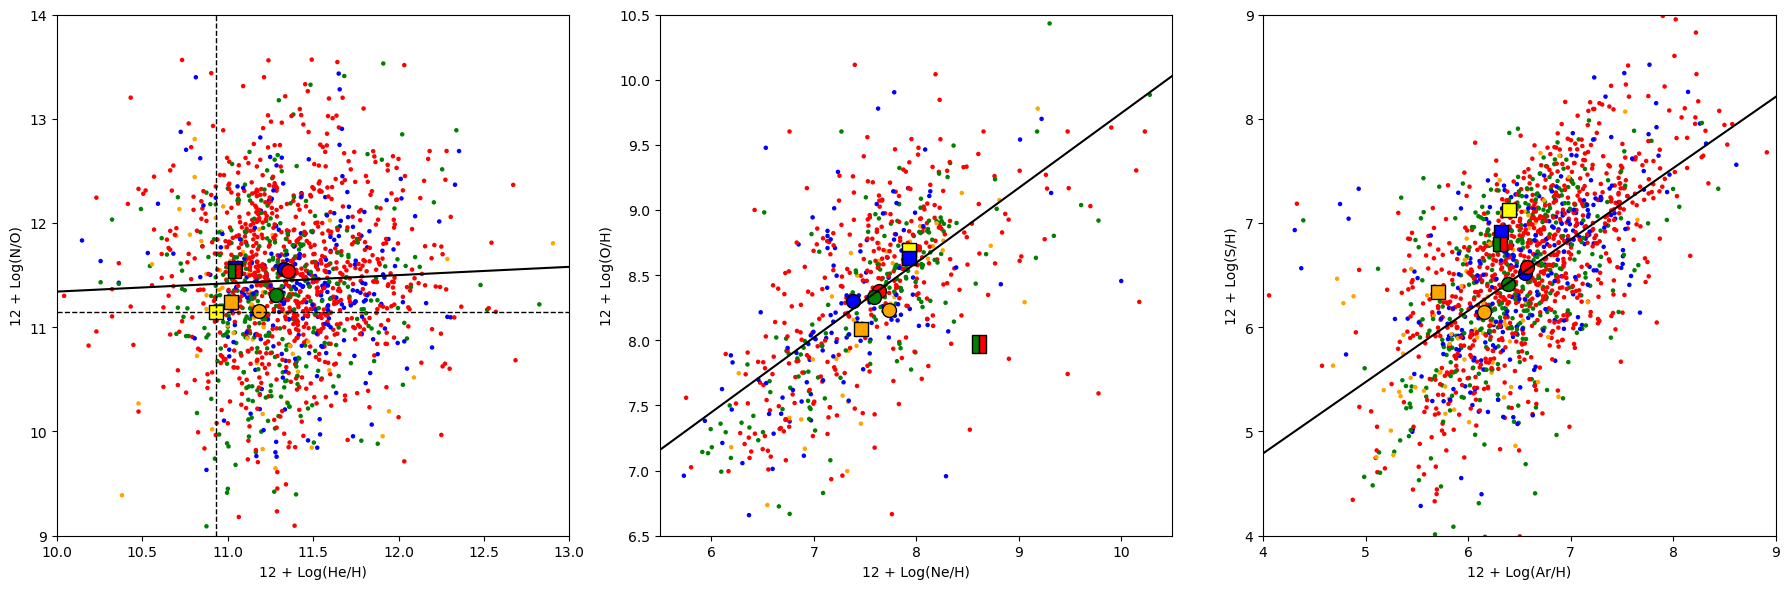

N/O vs He: y = (10.5501 ± 0.0478) + (0.0792 ± 0.1257)x, R^2 = 0.0016, n = 1303
S vs Ar: y = (2.0562 ± 0.0362) + (0.6837 ± 0.0536)x, R^2 = 0.3570, n = 1562
Ne vs O: y = (4.0028 ± 0.0448) + (0.5740 ± 0.0570)x, R^2 = 0.4472, n = 669

Component-wise Trend Line Information:
N/O vs He (Bulge): y = (9.1162 ± 0.1186) + (0.2074 ± 0.2888)x, R^2 = 0.0113, n = 242
N/O vs He (Thin Disc): y = (11.5470 ± 0.0671) + (-0.0113 ± 0.1805)x, R^2 = 0.0000, n = 663
N/O vs He (Thick Disk): y = (9.5784 ± 0.0906) + (0.1695 ± 0.2452)x, R^2 = 0.0077, n = 330
N/O vs He (Halo): y = (9.8873 ± 0.1986) + (0.1396 ± 0.6094)x, R^2 = 0.0042, n = 68
S vs Ar (Bulge): y = (2.5345 ± 0.0865) + (0.6111 ± 0.1280)x, R^2 = 0.3164, n = 264
S vs Ar (Thin Disc): y = (1.9762 ± 0.0478) + (0.6995 ± 0.0687)x, R^2 = 0.3947, n = 847
S vs Ar (Thick Disk): y = (2.1170 ± 0.0797) + (0.6676 ± 0.1339)x, R^2 = 0.2636, n = 371
S vs Ar (Halo): y = (2.2824 ± 0.1646) + (0.6354 ± 0.2770)x, R^2 = 0.2640, n = 80
Ne vs O (Bulge): y = (4.3319 ± 0.1123) + (

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import linregress
from matplotlib.patches import Rectangle

# Excel dosyasını oku
dosya_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
sayfa_adi = "Total_abundance"
data = pd.read_excel(dosya_yolu, sheet_name=sayfa_adi)

# "no distance" olanları filtrele
data = data[data['Gbileşen'] != 'no distance']

# Sütun başlıklarıyla birlikte verileri al
He_H = data["He/H"] + 12.0
N_H = data["N/H"] + 12.0
O_H = data["O/H"] + 12.0
Ne_H = data["Ne/H"] + 12.0
Ar_H = data["Ar/H"] + 12.0
S_H = data["S/H"] + 12.0
Cl_H = data["Cl/H"] + 12.0

# Solar, disk, bulge ve halo değerleri
sol = [-1.07, -4.17, -3.31, -4.07, -5.6, -4.88, -6.50]
disk = [-0.96, -3.87, -3.39, -4.03, -5.69, -5.20, -6.94]
bulge = [-0.96, -3.80, -3.37, -4.07, -5.68, -5.09, -6.01]
halo = [-0.98, -4.15, -3.91, -4.54, -6.29, -5.66, -7.86]

#He/H, N/H, O/H, Ne/H, S/H, Cl/H, Ar/H
our_Bulge = [-0.67, -4.14, -3.70, -4.62, -5.45, -6.29, -5.48]
our_Thindisc = [-0.65, -4.08, -3.62, -4.36, -5.43, -6.12, -5.42]
our_Thickdisc = [-0.72, -4.36, -3.67, -4.41, -5.61, -6.31, -5.59]
our_Halo = [-0.82, -4.61, -3.77, -4.27, -5.85, -6.47, -5.85]


# Renk haritası oluştur
color_map = {
    'Bulge': 'blue',
    'Thin Disc': 'red',
    'Thick Disk': 'green',
    'Halo': 'orange'
}

# Veri noktaları için renkleri belirle
colors = data['Gbileşen'].map(color_map)

# Trend çizgisi ve R^2 değerlerini kaydetmek için liste
trend_info = []
component_trend_info = []

# Trend çizgisi eklemek için yardımcı fonksiyon
def add_trend_line(ax, x_data, y_data, label):
    mask = np.isfinite(x_data) & np.isfinite(y_data)
    x_data_clean = x_data[mask]
    y_data_clean = y_data[mask]
    
    if len(x_data_clean) > 1:
        # Linear regression with standard error
        slope, intercept, r_value, p_value, std_err = linregress(x_data_clean, y_data_clean)
        
        # Manuel olarak belirlenen X ekseni limitlerine göre trend çizgisi oluştur
        x_min, x_max = ax.get_xlim()  # Grafik için belirlediğiniz x sınırlarını al
        x_values = np.linspace(x_min, x_max, 100)
        y_values = slope * x_values + intercept
        
        # Çizgiyi grafiğe ekle
        ax.plot(x_values, y_values, color='black', linestyle='-', label=label)
        
        # Calculate confidence intervals
        n = len(x_data_clean)
        t = 2.306  # 95% confidence interval for large sample sizes (df > 30)
        slope_ci = t * std_err
        intercept_ci = t * std_err * np.sqrt(np.sum((x_data_clean - np.mean(x_data_clean))**2) / n)
        
        trend_info.append(f"{label}: y = ({intercept:.4f} ± {intercept_ci:.4f}) + ({slope:.4f} ± {slope_ci:.4f})x, R^2 = {r_value**2:.4f}, n = {n}")

# Her bileşen için trend çizgisi hesaplamak için yardımcı fonksiyon
def calculate_component_trend(x_data, y_data, component, label):
    mask = (data['Gbileşen'] == component) & np.isfinite(x_data) & np.isfinite(y_data)
    x_data_clean = x_data[mask]
    y_data_clean = y_data[mask]
    
    if len(x_data_clean) > 1:
        # Linear regression with standard error
        slope, intercept, r_value, p_value, std_err = linregress(x_data_clean, y_data_clean)
        
        # Calculate confidence intervals
        n = len(x_data_clean)
        t = 2.306  # 95% confidence interval for large sample sizes (df > 30)
        slope_ci = t * std_err
        intercept_ci = t * std_err * np.sqrt(np.sum((x_data_clean - np.mean(x_data_clean))**2) / n)
        
        component_trend_info.append(f"{label} ({component}): y = ({intercept:.4f} ± {intercept_ci:.4f}) + ({slope:.4f} ± {slope_ci:.4f})x, R^2 = {r_value**2:.4f}, n = {n}")

# Grafik oluştur
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 2 columns

######################     NO     #####################  
axs[0].axhline(y=11.15, color='black', linestyle='--', linewidth=1)  # Y eksenine kesikli siyah çizgi
axs[0].axvline(x=10.93, color='black', linestyle='--', linewidth=1)

N_O = pd.Series([N_H_val - O_H_val + 12.0 for N_H_val, O_H_val in zip(N_H, O_H)])
axs[0].scatter(He_H, N_O, color=colors, s=5)
axs[0].set_xlabel('12 + Log(He/H)')
axs[0].set_ylabel('12 + Log(N/O)')
axs[0].set_ylim(9, 14)
axs[0].set_xlim(10, 13)
axs[0].scatter(our_Bulge[0] + 12.0, our_Bulge[1] - our_Bulge[2] + 12.0, color='blue', edgecolors='black', linewidths=1, s=100)
axs[0].scatter(our_Thindisc[0] + 12.0, our_Thindisc[1] - our_Thindisc[2] + 12.0, color='red', edgecolors='black', linewidths=1, s=100)
axs[0].scatter(our_Thickdisc[0] + 12.0, our_Thickdisc[1] - our_Thickdisc[2] + 12.0, color='green', edgecolors='black', linewidths=1, s=100)
axs[0].scatter(our_Halo[0] + 12.0, our_Halo[1] - our_Halo[2] + 12.0, color='orange', edgecolors='black', linewidths=1, s=100)

axs[0].scatter(10.93, 12.0 - 0.85, color='yellow', edgecolors='black', linewidths=1, s=100, marker='s')
axs[0].scatter(bulge[0] + 12.0, 12.0 + bulge[1] - bulge[2], color='blue', edgecolors='black', linewidths=1, s=100, marker='s')

sizee = 0.1  # s=100 için
# Kırmızı yarım kare
rect_red = Rectangle((disk[0] + 12.0 , 12.0 + disk[1] - disk[2]- sizee/2), 0.04, sizee+0.04, facecolor='red', edgecolor='black', linewidth=1, zorder=2)

# Yeşil yarım kare
rect_green = Rectangle((disk[0] + 12.0- 0.04, 12.0 + disk[1] - disk[2]- sizee/2), 0.04, sizee+0.04, 
                       facecolor='green', edgecolor='black', linewidth=1, zorder=3)

# Kareleri ekle
axs[0].add_patch(rect_red)
axs[0].add_patch(rect_green)

axs[0].scatter(halo[0] + 12.0, 12.0 + halo[1] - disk[2], color='orange', edgecolors='black', linewidths=1, s=100, marker='s')
add_trend_line(axs[0], He_H, N_O, 'N/O vs He')
for component in color_map.keys():
    calculate_component_trend(He_H, N_O, component, 'N/O vs He')
    
#####################     S/Ar     #####################     
axs[2].scatter(Ar_H, S_H, color=colors, s=5)
axs[2].set_xlabel('12 + Log(Ar/H)')
axs[2].set_ylabel('12 + Log(S/H)')
axs[2].set_ylim(4, 9)
axs[2].set_xlim(4, 9)
axs[2].scatter(our_Bulge[4] + 12.0, our_Bulge[6] + 12.0, color='blue', edgecolors='black', linewidths=1, s=100)
axs[2].scatter(our_Thindisc[4] + 12.0, our_Thindisc[6] + 12.0, color='red', edgecolors='black', linewidths=1, s=100)
axs[2].scatter(our_Thickdisc[4] + 12.0, our_Thickdisc[6] + 12.0, color='green', edgecolors='black', linewidths=1, s=100)
axs[2].scatter(our_Halo[4] + 12.0, our_Halo[6] + 12.0, color='orange', edgecolors='black', linewidths=1, s=100)

axs[2].scatter(sol[4] + 12.0, sol[5] + 12.0, color='yellow', edgecolors='black', linewidths=1, s=100, marker='s')
axs[2].scatter(bulge[4] + 12.0, bulge[5] + 12.0, color='blue', edgecolors='black', linewidths=1, s=100, marker='s')
axs[2].scatter(halo[4] + 12.0, halo[5] + 12.0, color='orange', edgecolors='black', linewidths=1, s=100, marker='s')

size = 0.135  # s=100 için
# Kırmızı ve yeşil yarım kareler
rect_green = Rectangle((disk[4] + 12.0 - size / 2, disk[5] + 12.0 - size / 2), size / 2, size, 
                       facecolor='green', edgecolor='black', linewidth=1, zorder=2)
rect_red = Rectangle((disk[4] + 12.0, disk[5] + 12.0 - size / 2), size / 2, size, 
                     facecolor='red', edgecolor='black', linewidth=1, zorder=3)
# Kareleri ekle
axs[2].add_patch(rect_green)
axs[2].add_patch(rect_red)

add_trend_line(axs[2], Ar_H, S_H, 'S vs Ar')
for component in color_map.keys():
    calculate_component_trend(Ar_H, S_H, component, 'S vs Ar')
    
#####################     Ne/O     #####################     
axs[1].scatter(Ne_H, O_H, color=colors, s=5)
axs[1].set_xlabel('12 + Log(Ne/H)')
axs[1].set_ylabel('12 + Log(O/H)')
axs[1].set_ylim(6.5, 10.5)
axs[1].set_xlim(5.5, 10.5)
axs[1].scatter(our_Bulge[3] + 12.0, our_Bulge[2] + 12.0, color='blue', edgecolors='black', linewidths=1, s=100)
axs[1].scatter(our_Thindisc[3] + 12.0, our_Thindisc[2] + 12.0, color='red', edgecolors='black', linewidths=1, s=100)
axs[1].scatter(our_Thickdisc[3] + 12.0, our_Thickdisc[2] + 12.0, color='green', edgecolors='black', linewidths=1, s=100)
axs[1].scatter(our_Halo[3] + 12.0, our_Halo[2] + 12.0, color='orange', edgecolors='black', linewidths=1, s=100)

axs[1].scatter(sol[3] + 12.0, sol[2] + 12.0, color='yellow', edgecolors='black', linewidths=1, s=100, marker='s')
axs[1].scatter(bulge[3] + 12.0, bulge[2] + 12.0, color='blue', edgecolors='black', linewidths=1, s=100, marker='s')
axs[1].scatter(halo[3] + 12.0, halo[2] + 12.0, color='orange', edgecolors='black', linewidths=1, s=100, marker='s')

size = 0.135  # s=100 için
# Kırmızı ve yeşil yarım kareler
rect_green = Rectangle((disk[2] + 12.0 - size / 2, disk[3] + 12.0 - size / 2), size / 2, size, 
                       facecolor='green', edgecolor='black', linewidth=1, zorder=2)
rect_red = Rectangle((disk[2] + 12.0, disk[3] + 12.0 - size / 2), size / 2, size, 
                     facecolor='red', edgecolor='black', linewidth=1, zorder=3)
# Kareleri ekle
axs[1].add_patch(rect_green)
axs[1].add_patch(rect_red)

add_trend_line(axs[1], Ne_H, O_H, 'Ne vs O')
for component in color_map.keys():
    calculate_component_trend(Ne_H, O_H, component, 'Ne vs O')

# Grafik ayarları
plt.tight_layout()
plt.savefig('/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/3_Ne_S_Ar.pdf')   # save the figure to file
plt.show()

# Trend çizgisi bilgilerini yazdır
for info in trend_info:
    print(info)

print("\nComponent-wise Trend Line Information:")
for info in component_trend_info:
    print(info)
    
# Trend çizgisi bilgisini dosyaya yaz
trend_info_file = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/3_trend_info_Ne_S_Ar.txt'
with open(trend_info_file, 'w') as f:
    f.write("General Trend Information:\n")
    for info in trend_info:
        f.write(info + "\n")
    f.write("\nComponent-wise Trend Information:\n")
    for info in component_trend_info:
        f.write(info + "\n")

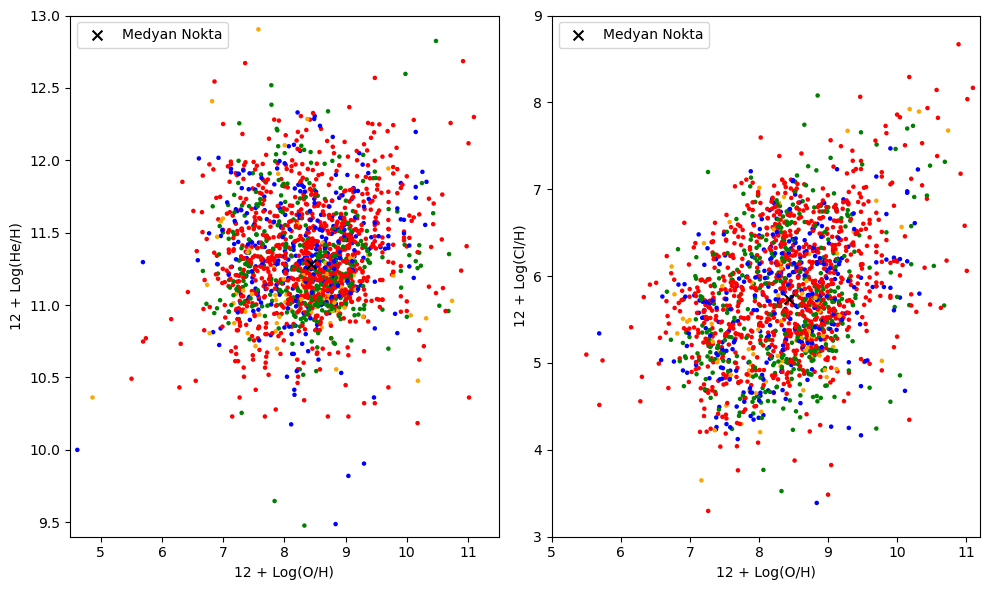

Medyan O/H ve He/H için: (8.42813479402879, 11.285557309007773)
Medyan O/H ve Cl/H için: (8.42813479402879, 5.732795512464769)


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Excel dosyasını oku
dosya_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
sayfa_adi = "Total_abundance"
data = pd.read_excel(dosya_yolu, sheet_name=sayfa_adi)

# "no distance" olanları filtrele
data = data[data['Gbileşen'] != 'no distance']

# Sütun başlıklarıyla birlikte verileri al
He_H = data["He/H"] + 12.0
O_H = data["O/H"] + 12.0
Cl_H = data["Cl/H"] + 12.0

# NaN değerlerini hem O_H hem de He_H için eş zamanlı kaldır (aynı satırlardan)
filtered_data = data.dropna(subset=["He/H", "O/H", "Cl/H"])
He_H = filtered_data["He/H"] + 12.0
O_H = filtered_data["O/H"] + 12.0
Cl_H = filtered_data["Cl/H"] + 12.0

# Renk haritası oluştur
color_map = {
    'Bulge': 'blue',
    'Thin Disc': 'red',
    'Thick Disk': 'green',
    'Halo': 'orange'
}

# Veri noktaları için renkleri belirle
colors = filtered_data['Gbileşen'].map(color_map)

# Grafik oluştur
fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # 1 row, 2 columns

#####################     He     #####################     
axs[0].scatter(O_H, He_H, color=colors, s=5)
axs[0].set_xlabel('12 + Log(O/H)')
axs[0].set_ylabel('12 + Log(He/H)')
axs[0].set_ylim(9.4, 13)
axs[0].set_xlim(4.5, 11.5)

# He-H ve O-H için medyan değerler
median_O_H_He = np.median(O_H)
median_He_H = np.median(He_H)

# Medyan noktayı çizdir
axs[0].scatter(median_O_H_He, median_He_H, color='black', s=50, marker='x', label='Medyan Nokta')
axs[0].legend()

#####################     Cl     #####################     
axs[1].scatter(O_H, Cl_H, color=colors, s=5)
axs[1].set_xlabel('12 + Log(O/H)')
axs[1].set_ylabel('12 + Log(Cl/H)')
axs[1].set_ylim(3, 9)
axs[1].set_xlim(5, 11.2)

# Cl-H ve O-H için medyan değerler
median_O_H_Cl = np.median(O_H)
median_Cl_H = np.median(Cl_H)

# Medyan noktayı çizdir
axs[1].scatter(median_O_H_Cl, median_Cl_H, color='black', s=50, marker='x', label='Medyan Nokta')
axs[1].legend()

# Grafik ayarları
plt.tight_layout()
plt.savefig('/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/medyan_nokta.pdf')   # save the figure to file
plt.show()

# Medyan değerlerini çıktı olarak göster
print(f"Medyan O/H ve He/H için: ({median_O_H_He}, {median_He_H})")
print(f"Medyan O/H ve Cl/H için: ({median_O_H_Cl}, {median_Cl_H})")
